In [1]:
!wget https://www.dropbox.com/scl/fi/kj83basqexziyfl5ml3j3/archive.zip?rlkey=sc1qjblu7ob4zkgwrrhk33c3w&dl=0

--2024-03-15 04:44:33--  https://www.dropbox.com/scl/fi/kj83basqexziyfl5ml3j3/archive.zip?rlkey=sc1qjblu7ob4zkgwrrhk33c3w
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc49645c0ef86399253806e44550.dl.dropboxusercontent.com/cd/0/inline/CPHQhuNEke8EcXgU_G7spMSNtwWy5RcshlOUywORmmfimgF4q-Af_aZOr43FMSS9EkzHU0LFB0AB9tKqBFzEPokJAbBwmmNtkVQJsL0H3Ye--YBNMjholoFINF4fMmLsicI9Y6o8sCrTWTKuF60SzxQI/file# [following]
--2024-03-15 04:44:34--  https://uc49645c0ef86399253806e44550.dl.dropboxusercontent.com/cd/0/inline/CPHQhuNEke8EcXgU_G7spMSNtwWy5RcshlOUywORmmfimgF4q-Af_aZOr43FMSS9EkzHU0LFB0AB9tKqBFzEPokJAbBwmmNtkVQJsL0H3Ye--YBNMjholoFINF4fMmLsicI9Y6o8sCrTWTKuF60SzxQI/file
Resolving uc49645c0ef86399253806e44550.dl.dropboxusercontent.com (uc49645c0ef86399253806e44550.dl.dropboxusercontent.com)... 162.125.8.15, 2620:10

In [2]:
!unzip /content/archive.zip?rlkey=sc1qjblu7ob4zkgwrrhk33c3w

Archive:  /content/archive.zip?rlkey=sc1qjblu7ob4zkgwrrhk33c3w
   creating: archive/
   creating: archive/Brain Tumor/
   creating: archive/Brain Tumor/Brain Tumor/
  inflating: archive/Brain Tumor/Brain Tumor/y0.jpg  
  inflating: archive/Brain Tumor/Brain Tumor/y1.jpg  
  inflating: archive/Brain Tumor/Brain Tumor/y10.jpg  
  inflating: archive/Brain Tumor/Brain Tumor/y100.jpg  
  inflating: archive/Brain Tumor/Brain Tumor/y1000.jpg  
  inflating: archive/Brain Tumor/Brain Tumor/y1001.jpg  
  inflating: archive/Brain Tumor/Brain Tumor/y1002.jpg  
  inflating: archive/Brain Tumor/Brain Tumor/y1003.jpg  
  inflating: archive/Brain Tumor/Brain Tumor/y1004.jpg  
  inflating: archive/Brain Tumor/Brain Tumor/y1005.jpg  
  inflating: archive/Brain Tumor/Brain Tumor/y1006.jpg  
  inflating: archive/Brain Tumor/Brain Tumor/y1007.jpg  
  inflating: archive/Brain Tumor/Brain Tumor/y1008.jpg  
  inflating: archive/Brain Tumor/Brain Tumor/y1009.jpg  
  inflating: archive/Brain Tumor/Brain Tumor/y

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import matplotlib as plt
import os
import math
import shutil
import glob


In [5]:
#count the number of images in the respective classes 0 - brain tumor and 1 - Healthey
ROOT_DIR = "/content/archive/Brain Tumor"

number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR,dir)))


In [6]:
number_of_images.items()

dict_items([('Healthey', 1500), ('Brain Tumor', 1500)])

In [7]:
len(os.listdir("/content/archive/Brain Tumor"))

2

In [8]:
def dataFolder(p, split):

  if not os.path.exists("./"+p):
    os.mkdir("./" +p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs("./"+p+"/"+dir)
      for img in np.random.choice(a= os.listdir(os.path.join(ROOT_DIR,dir)),
                                  size = (math.floor(split*number_of_images[dir])-5),
                                  replace = False):
        O = os.path.join(ROOT_DIR , dir , img)
        D = os.path.join("./"+p,dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print(f" {p} folder exists")









In [9]:
dataFolder("train" ,0.7)

In [10]:
dataFolder("val" , 0.15)

In [11]:
dataFolder("test" , 0.15)

# MODEL BUILDING

In [12]:
from keras.layers import Conv2D , MaxPool2D , Dropout , Flatten , Dense , BatchNormalization , GlobalAvgPool2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import keras

In [13]:
# CNN Model

model = Sequential()
model.add(Conv2D(filters= 16 , kernel_size= (3,3) , activation= 'relu' , input_shape = (224,224,3)))

model.add(Conv2D(filters= 36 , kernel_size= (3,3) , activation= 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters= 64 , kernel_size= (3,3) , activation= 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters= 64 , kernel_size= (3,3) , activation= 'relu'))
model.add(MaxPool2D(pool_size = (2,2)))


model.add(Dropout(rate= 0.25))

model.add(Flatten())

model.add(Dense(units = 64 , activation= 'relu'))

model.add(Dropout(rate= 0.25))

model.add(Dense(units = 1 , activation= 'sigmoid'))

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 36)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 64)        3

In [14]:
model.compile(optimizer='adam' , loss = keras.losses.binary_crossentropy, metrics = ['accuracy'])

Prepare our Data using Data Genarator


In [15]:
def preprocessingImages(path):
  """
  input : Path
  output : Pre Processed images
  """
  image_data = ImageDataGenerator(zoom_range= 0.2 , shear_range= 0.2 , rescale = 1/255, horizontal_flip=True)

  image = image_data.flow_from_directory(directory= path, target_size= (224,224), batch_size = 32, class_mode = 'binary')

  return image

In [67]:
path = "/content/train"
train_data = preprocessingImages(path)

Found 2090 images belonging to 2 classes.


In [66]:
def preprocessingImages2(path):
  """
  input : Path
  output : Pre Processed images
  """
  image_data = ImageDataGenerator(rescale = 1/255)

  image = image_data.flow_from_directory(directory= path, target_size= (224,224), batch_size = 32, class_mode = 'binary')

  return image

In [65]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 440 images belonging to 2 classes.


In [64]:
path = "/content/val"
val_data = preprocessingImages2(path)

Found 440 images belonging to 2 classes.


In [20]:
# Early stopping and model check points

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping

es = EarlyStopping(monitor="val_accuracy" , min_delta=0.01 ,patience = 5 , verbose = 1 , mode='auto')

# model check point

mc = ModelCheckpoint(monitor="val_accuracy", filepath="./bestmodel.h5", verbose=1, save_best_only=True , mode='auto')

cd = [es , mc]


# **Model Training**

In [ ]:
hs = model.fit_generator(generator= train_data,
                         steps_per_epoch= 8 ,
                         epochs = 25 , verbose=1,
                         validation_data=val_data ,
                         validation_steps=16,
                         callbacks=cd)





Epoch 1/25
8/8 [==============================] - ETA: 0s - loss: 0.5732 - accuracy: 0.7305


Epoch 1: val_accuracy improved from 0.73182 to 0.73864, saving model to ./bestmodel.h5
8/8 [==============================] - 44s 6s/step - loss: 0.5732 - accuracy: 0.7305 - val_loss: 0.5444 - val_accuracy: 0.7386
Epoch 2/25
8/8 [==============================] - ETA: 0s - loss: 0.6052 - accuracy: 0.6641

8/8 [==============================] - 23s 3s/step - loss: 0.6052 - accuracy: 0.6641
Epoch 3/25
8/8 [==============================] - ETA: 0s - loss: 0.5979 - accuracy: 0.5977

8/8 [==============================] - 22s 3s/step - loss: 0.5979 - accuracy: 0.5977
Epoch 4/25
8/8 [==============================] - ETA: 0s - loss: 0.5687 - accuracy: 0.6875

8/8 [==============================] - 23s 3s/step - loss: 0.5687 - accuracy: 0.6875
Epoch 5/25
6/8 [=====================>........] - ETA: 5s - loss: 0.5483 - accuracy: 0.7292

In [24]:
# model graphical interpritation

h = hs.history
h.keys()

dict_keys(['loss', 'accuracy'])

In [26]:
import matplotlib.pyplot as plt


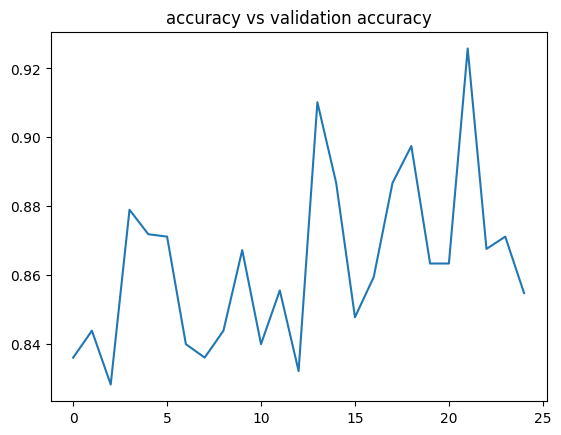

In [28]:
plt.plot(h['accuracy'])
#plt.plot(h['val_accuracy'])
plt.title("accuracy vs validation accuracy")
plt.show()

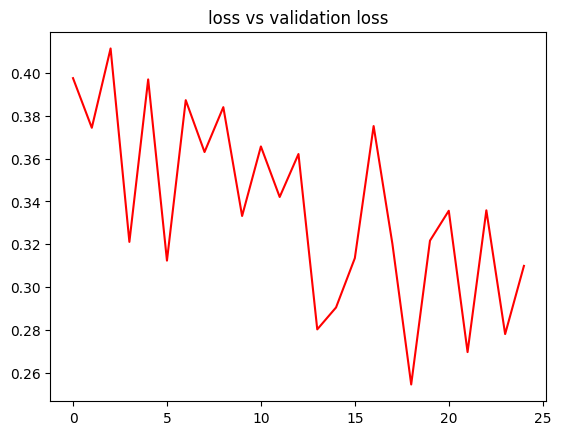

In [31]:
plt.plot(h['loss'],c = "red")
#plt.plot(h['val_loss'], c = "red")
plt.title("loss vs validation loss")
plt.show()

In [32]:
# model accuracy

from keras.models import load_model
model = load_model("/content/bestmodel.h5")


Model Acuuracy


In [33]:
acc = model.evaluate_generator(test_data)[1]
print(f"accuracy of the model is {acc*100}%")

accuracy of the model is 74.54545497894287%


In [34]:
from keras.preprocessing.image import load_img , img_to_array

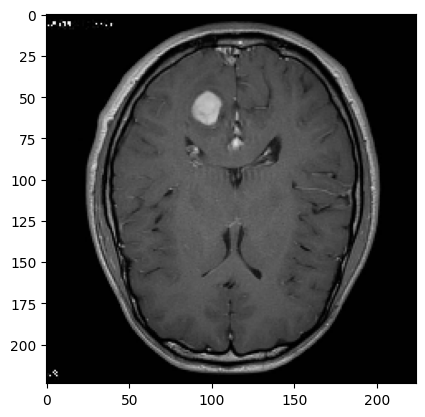

1/1 [==============================] - 0s 34ms/step
0.49269625544548035 Properbly this man has a cancer


In [63]:
path = "/content/test/Brain Tumor/y118.jpg"
img = load_img(path, target_size=(224,224))
input_arr = img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)
pred = model.predict(input_arr)[0][0]
pred

if pred >=  0.5:
  print(f"{pred} Properbly This man has No cancer")
elif pred < 0.5 :
  print(f"{pred} Properbly this man has a cancer")



In [36]:
train_data.class_indices

{'Brain Tumor': 0, 'Healthey': 1}